In [2]:
import os     #Read files
import numpy as np
import cv2
import matplotlib.pyplot as plt   #visualisation
import tensorflow as tf
import tf_keras as keras
from tf_keras.models import load_model
from tf_keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import precision_score, recall_score, accuracy_score


In [3]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [4]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

Load Model

In [5]:
model_standar_path = 'model\EyeClassifier.h5'
model = load_model(os.path.join('model', 'EyeClassifier.h5'))

Size Model

In [6]:
keras_model_size = convert_bytes(get_file_size(model_standar_path), "MB")
keras_model_size

File size: 384.273 Megabytes


Load Data Test

In [7]:
test_folder = 'DrowsinessDetection\\test\class'
data_test = keras.utils.image_dataset_from_directory(test_folder, batch_size=16, image_size=(128,128),  color_mode='grayscale', label_mode='binary')
data_test = data_test.map(lambda x, y: (x / 255.0, y))
test_img = "EyeClassification/matabuka.jpg"
# test_img = "EyeClassification/matatutup.jpg"
batch = data_test.as_numpy_iterator().next()


Found 626 files belonging to 2 classes.


Test Model

In [8]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy ()

In [9]:
for batch in data_test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 0s 22ms/step
Precision:0.9786585569381714, Recall:0.9668674468994141, Accuracy:0.9712460041046143


1/1 [==============================] - 0s 24ms/step
Preedicted eyes open [[1.]]


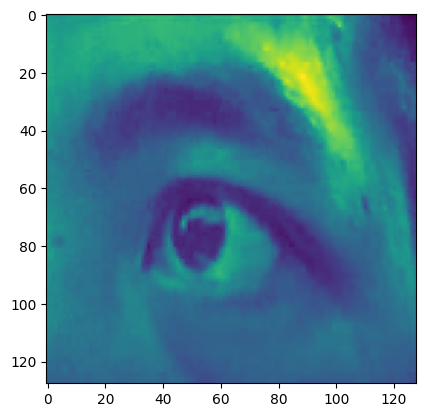

In [27]:
img = cv2.imread("matabuka.jpg", cv2.IMREAD_GRAYSCALE)
img_with_channel = img[..., tf.newaxis]

resize = tf.image.resize(img_with_channel, (128,128))
plt.imshow(resize)

yhat = model.predict(np.expand_dims(resize, 0))
yhat

if yhat > 0.5:
    print(f'Preedicted eyes open {yhat}')
else:
    print(f'Preedicted eyes close {yhat}')

Tf Lite Convert


In [10]:
specific_directory = "model"
flite_model_path = os.path.join(specific_directory, "eye_classy_lite.tflite")
flite_model_path

'model\\eye_classy_lite.tflite'

In [11]:
tflite_model = tf.lite.TFLiteConverter.from_keras_model(model).convert()
open(flite_model_path, "wb").write(tflite_model) 

INFO:tensorflow:Assets written to: C:\Users\ULTRON\AppData\Local\Temp\tmpokjwdfg0\assets


INFO:tensorflow:Assets written to: C:\Users\ULTRON\AppData\Local\Temp\tmpokjwdfg0\assets


134300432

In [12]:
tflite_size = convert_bytes(get_file_size("model\eye_classy_lite.tflite"), "MB")
tflite_size

File size: 128.079 Megabytes


TF LITE INterpreter

In [23]:
img = keras.utils.load_img(
    "matabuka.jpg", target_size=(128,128)
)

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


In [24]:
interpreter = tf.lite.Interpreter(model_path='model\eye_classy_lite.tflite')
interpreter.get_signature_list()

{'serving_default': {'inputs': ['random_contrast_input'],
  'outputs': ['dense_1']}}

In [25]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [26]:
predictions_lite = classify_lite(random_contrast_input=img_array)['dense_1']
score_lite = tf.nn.sigmoid(predictions_lite)

print(
    predictions_lite, score_lite
)

[[1.]] tf.Tensor([[0.7310586]], shape=(1, 1), dtype=float32)
